# Noise classification with MELs

### Функция Multiplicate

In [1]:
#Пример
#На вход подается массив [1, 2, 3, 4]
#На выходе функции ожидается массив [24, 12, 8, 6]

def multiplicate(A): 
    #print(A)
    new_A=[]

    #find total multiplication
    mul = 1
    for i in A:
        if i == 0: #Защита от операций деления/умножения на 0
            i=1
        #print(str(i))
        mul= mul*i

    for i in A:
        if i == 0: #Защита от операций деления/умножения на 0
            i=1
        #print(mul/i)
        new_A.append(int(mul/i))
    return new_A

A = [1, 2, 3, 4]
new_A = multiplicate(A)
print(str(A) + '\n'  + str(new_A))

[1, 2, 3, 4]
[24, 12, 8, 6]


## Getting .npy files to mel - example

In [2]:
import librosa # for mel-spectrogram estimation
import soundfile # for opening .flac audio
from matplotlib import pyplot as plt
import numpy as np
import numpy as np
import time
import os
#import torch
import math

In [3]:
def get_full_file_path(sound_type, dataset_type, root_dir, dir_file_num, file_name):
    if dataset_type =="train":
        dataset_type_dir = 'train/train/'
    elif dataset_type =="test":
        dataset_type_dir = 'val/val/'
  
    full_file_path =   root_dir + dataset_type_dir + sound_type + '/'  + str(dir_file_num) + '/' + file_name
  
    return full_file_path 

In [4]:
def read_stored_file_to_array(file_path):

    t1=time.time()
    array_reloaded = np.load(file_path)
    t2=time.time()
    print(array_reloaded)
    print('\nShape: ',array_reloaded.shape)
    print(f"Time took to load: {t2-t1} seconds.")
    return array_reloaded

In [5]:
def get_mel(full_file_path):
    raw = np.load(full_file_path)
    mel = np.array(raw).astype(np.float64).transpose()
    
    return mel

In [12]:
root_dir = './'
#root_dir = "/content/drive/MyDrive/goznak/"
dataset_type = 'train'
dir_file_num = 20
file_name = '20_205_20-205-0012.npy'

In [13]:
sound_type_clean = 'clean'
clean_file_path = get_full_file_path(sound_type_clean, dataset_type, root_dir, dir_file_num, file_name)
print(clean_file_path)
sound_type_noisy = 'noisy'
noise_file_path = get_full_file_path(sound_type_noisy, dataset_type, root_dir, dir_file_num, file_name)
print(noise_file_path)

./train/train/clean/20/20_205_20-205-0012.npy
./train/train/noisy/20/20_205_20-205-0012.npy


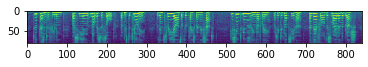

In [14]:
clean_mel = get_mel(clean_file_path)
plt.imshow(clean_mel)

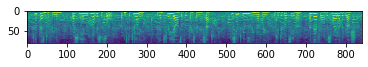

In [15]:
noisy_mel = get_mel(noise_file_path)
plt.imshow(noisy_mel)

### Generating images from mel spectrograms for Convolutional Neural Network Training

In [16]:
dataset_type_list = ['train', 'test']
mel_type_list = ['clean', 'noisy']

In [17]:
def load_images_from_mel_spectrograms(path_to_raw_spectrograms,target_img_folder):
    i=1
    for entry in os.scandir(path_to_raw_spectrograms):
        if entry.is_dir():
            print(entry.path)
            for subentry in os.scandir(entry.path):
                #print(subentry.path)
                mel = get_mel(subentry.path)
                #clean_mel_imgs.append(mel)
                plt.imsave(target_img_folder + str(i) +'.png', clean_mel)
                print(i)
                i+=1

In [18]:
import os

dataset_type_list = ['train', 'test']
mel_type_list = ['clean', 'noisy']

#Save images to train/clean dir
prepare_structure_enable = False

if prepare_structure_enable ==True:
    print("Start loading images...")
  
    root_dir = "/content/drive/MyDrive/goznak/"

    #######################################################################################
    #Loading clean training images
    #######################################################################################
    target_img_folder = root_dir + "/dataset/train/clean/"
    #For Test
    #target_img_folder = root_dir + "/dataset_1/train/clean/"
    path_to_raw_spectrograms = root_dir + "/train/train/clean/"

    load_images_from_mel_spectrograms(path_to_raw_spectrograms,target_img_folder)

    #######################################################################################
    #Loading noisy training images
    #######################################################################################

    target_img_folder = root_dir + "/dataset/train/noisy/"
    #For Test
    #target_img_folder = root_dir + "/dataset_1/train/noisy/"
    path_to_raw_spectrograms = root_dir + "/train/train/noisy/"

    load_images_from_mel_spectrograms(path_to_raw_spectrograms,target_img_folder)

    #######################################################################################
    #Loading clean test images
    #######################################################################################

    target_img_folder = root_dir + "/dataset/test/clean/"
    #For Test
    #target_img_folder = root_dir + "/dataset_1/test/clean/"
    path_to_raw_spectrograms = root_dir + "/val/val/clean/"

    load_images_from_mel_spectrograms(path_to_raw_spectrograms,target_img_folder)

    #######################################################################################
    #Loading noisy test images
    #######################################################################################

    target_img_folder = root_dir + "/dataset/test/noisy/"
    #For Test
    #target_img_folder = root_dir + "/dataset_1/test/noisy/"
    path_to_raw_spectrograms = root_dir + "/val/val/noisy/"

    load_images_from_mel_spectrograms(path_to_raw_spectrograms,target_img_folder)

    print("Creating images finished!")
else:
    print("Creating images disabled option....")

Creating images disabled option....


### Part 1 - Data Preprocessing

### Preprocessing the Training and Test sets with ImageDataGenerator

In [22]:
from keras.models import load_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score,recall_score,f1_score
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.models import load_model
from sklearn.preprocessing import MinMaxScaler

import PIL
from PIL import Image

from PIL import Image, ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

import tensorflow as tf
tf.__version__
import itertools  

In [23]:
#Parameters
img_rows = 64
img_cols = 64
batch_size = 10

core_directory_for_deep_nn_dataset = '.\\dataset\\'

In [24]:
from keras.preprocessing.image import ImageDataGenerator

# Preprocessing the Train set
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

training_set = train_datagen.flow_from_directory(core_directory_for_deep_nn_dataset + 'train',
                                                 target_size = (img_rows, img_cols),
                                                 batch_size = batch_size,
                                                 class_mode = 'binary'
                                                , shuffle=False
                                                )

# Preprocessing the Test set
test_datagen = ImageDataGenerator(rescale = 1./255)

test_set = test_datagen.flow_from_directory(core_directory_for_deep_nn_dataset + 'test',
                                            target_size = (img_rows, img_cols),
                                            batch_size = batch_size,
                                            class_mode = 'binary'
                                           , shuffle=False)

Found 24000 images belonging to 2 classes.
Found 4000 images belonging to 2 classes.


## CNN Architecture

### Building the CNN

In [25]:
epochs = 10

In [26]:
# Initialising the CNN
cnn = tf.keras.models.Sequential()

# Step 1 - Convolution
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[img_rows, img_cols, 3]))

# Step 2 - Pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Adding a second convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Step 3 - Flattening
cnn.add(tf.keras.layers.Flatten())

# Step 4 - Full Connection
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

# Step 5 - Output Layer
#cnn.add(tf.keras.layers.Dense(units=9, activation='softmax'))
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Training the CNN

# Compiling the CNN
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
#cnn.compile(loss='binary_crossentropy', optimizer=RMSprop(lr=0.001), metrics='accuracy')

# Training the CNN on the Training set and evaluating it on the Test set
train_stats = cnn.fit(x = training_set, validation_data = test_set, epochs = epochs)

Epoch 1/10
2400/2400 [==============================] - 533s 222ms/step - loss: 0.4523 - accuracy: 0.7598 - val_loss: 0.2538 - val_accuracy: 0.8995
Epoch 2/10
2400/2400 [==============================] - 427s 178ms/step - loss: 0.2695 - accuracy: 0.8888 - val_loss: 0.2637 - val_accuracy: 0.8857
Epoch 3/10
2400/2400 [==============================] - 465s 194ms/step - loss: 0.2545 - accuracy: 0.8957 - val_loss: 0.2515 - val_accuracy: 0.8888
Epoch 4/10
2400/2400 [==============================] - 561s 234ms/step - loss: 0.2370 - accuracy: 0.9062 - val_loss: 0.2163 - val_accuracy: 0.9168
Epoch 5/10
2400/2400 [==============================] - 642s 268ms/step - loss: 0.2196 - accuracy: 0.9156 - val_loss: 0.2080 - val_accuracy: 0.9160
Epoch 6/10
2400/2400 [==============================] - 661s 276ms/step - loss: 0.2199 - accuracy: 0.9157 - val_loss: 0.2835 - val_accuracy: 0.8867
Epoch 7/10
2400/2400 [==============================] - 566s 236ms/step - loss: 0.2018 - accuracy: 0.9222 - val_

In [27]:
import keras
from tensorflow.keras.models import load_model
cnn.save('my_model.h5')

In [28]:
#Load model
model = load_model('my_model.h5')

In [29]:
def evaluating_set(model, model_name):
    
    print(model_name + ':')
    print('\n')
    model.evaluate(test_set)
    model.evaluate(training_set)
    print('\n')

In [30]:
def get_metrics(model, model_name,generator):
    cnn=model

    #Import metrics
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import precision_score
    from sklearn.metrics import recall_score
    from sklearn.metrics import f1_score
    from sklearn.metrics import cohen_kappa_score
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import confusion_matrix
    
    print('\n')
    print('SET: ' + model_name)
    print('\n')
    # predict probabilities for test set
    yhat_probs = cnn.predict(generator, verbose=0)
    # predict crisp classes for test set
    yhat_classes = cnn.predict_classes(generator, verbose=0)
    # reduce to 1d array
    yhat_probs = yhat_probs[:, 0]
    #yhat_classes = yhat_classes[:, 0]
    #Print the Target names

    testy = generator.classes

    # print(target_names)
    
    # accuracy: (tp + tn) / (p + n)
    accuracy = accuracy_score(testy, yhat_classes)
    print('Accuracy -  (tp + tn) / (p + n) : %f' % accuracy)
    # precision tp / (tp + fp)
    print('\n')
    precision = precision_score(testy, yhat_classes,average='macro')
    print('Precision -  tp / (tp + fp): %f' % precision)
    print('\n')
    # recall: tp / (tp + fn)
    recall = recall_score(testy, yhat_classes,average='macro')
    print('Rrecall -  tp / (tp + fn): %f' % recall)
    print('\n')
    # f1: 2 tp / (2 tp + fp + fn)
    f1 = f1_score(testy, yhat_classes,average='macro')
    print('F1 score -  2 tp / (2 tp + fp + fn): %f' % f1)
    print('\n')
    # kappa
    kappa = cohen_kappa_score(testy, yhat_classes)
    print('Cohens kappa: %f' % kappa)
    # ROC AUC
    #auc = roc_auc_score(testy, yhat_probs,multi_class ='ovr')
    #print('ROC AUC: %f' % auc)
    # confusion matrix
    print('\n')
    matrix = confusion_matrix(testy, yhat_classes)
    print("Confusion Matrix: ")
    draw_cm(matrix)
    return matrix

In [31]:
def draw_cm(cm):
    import seaborn as sn
    plt.figure(figsize = (7,5))
    sn.heatmap(cm,annot=True, fmt="d")
    plt.xlabel('Predicted')
    plt.ylabel('Truth')

In [36]:
def get_accuracy_graph(epochs_p, train_stats):

    history = train_stats.history
    accuracy = history["accuracy"]
    validation_accuracy = history["val_accuracy"]
    epochs = range(1, epochs_p + 1)

    plt.plot(epochs, accuracy, "b", label="Accuracy")
    plt.plot(epochs, validation_accuracy, "r", label="Validation Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.title("Accuracy Graphs")
    plt.show()

In [37]:
def get_loss_graph(epochs_p, train_stats):

    history = train_stats.history
    loss = history["loss"]
    validation_loss = history["val_loss"]
    epochs = range(1, epochs_p + 1)

    plt.plot(epochs, loss, "b", label="Loss")
    plt.plot(epochs, validation_loss, "r", label="Validation Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.title("Loss Graphs")
    plt.show()

### Расчет метрик

In [38]:
train_generator = training_set
test_generator = test_set

In [39]:
#Print the Target names
target_names = []
for key in train_generator.class_indices:
    target_names.append(key)

print(target_names)

['clean', 'noisy']


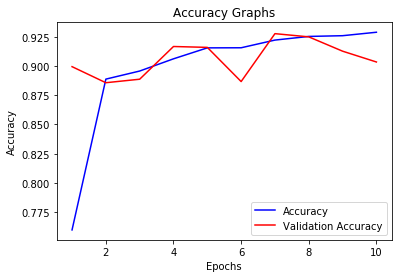

In [40]:
get_accuracy_graph(epochs, train_stats)

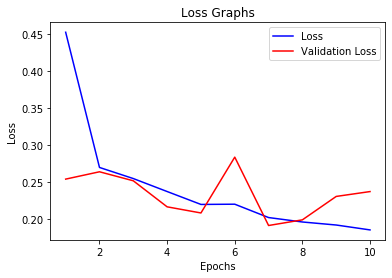

In [41]:
get_loss_graph(epochs, train_stats)



SET: TRAINING SET


Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Accuracy -  (tp + tn) / (p + n) : 0.917417


Precision -  tp / (tp + fp): 0.923864


Rrecall -  tp / (tp + fn): 0.917417


F1 score -  2 tp / (2 tp + fp + fn): 0.917101


Cohens kappa: 0.834833


Confusion Matrix: 


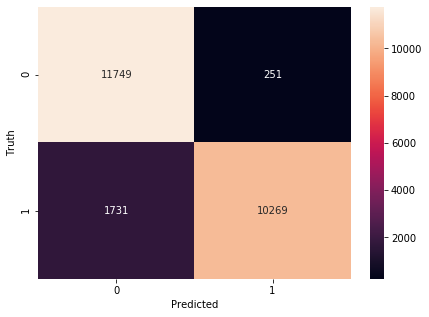

In [42]:
cm_train = get_metrics(model,'TRAINING SET',train_generator)



SET: VALIDATION SET


Accuracy -  (tp + tn) / (p + n) : 0.903500


Precision -  tp / (tp + fp): 0.913965


Rrecall -  tp / (tp + fn): 0.903500


F1 score -  2 tp / (2 tp + fp + fn): 0.902886


Cohens kappa: 0.807000


Confusion Matrix: 


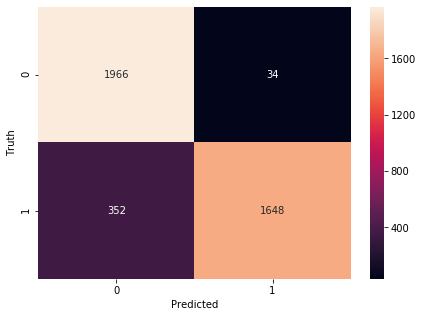

In [43]:
cm_test = get_metrics(model,'VALIDATION SET',test_generator)

In [44]:
evaluating_set(model, 'CONVOLUTIONAL NEURAL NETWORK EVALUATION:')

CONVOLUTIONAL NEURAL NETWORK EVALUATION::


2400/2400 [==============================] - 386s 161ms/step - loss: 0.2100 - accuracy: 0.9168


